In [1]:
!pip install utm

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.8.0-py3-none-any.whl size=8536 sha256=f88284480c74845a2e2d0e5aa30130b7465be3cb2a252558fc72ddfbc0974afa
  Stored in directory: /root/.cache/pip/wheels/b0/88/9b/1968d3a5933864f7d6312d8217027dd4d52b9647f678c67023
Successfully built utm


RMSE: 16.6513 meters


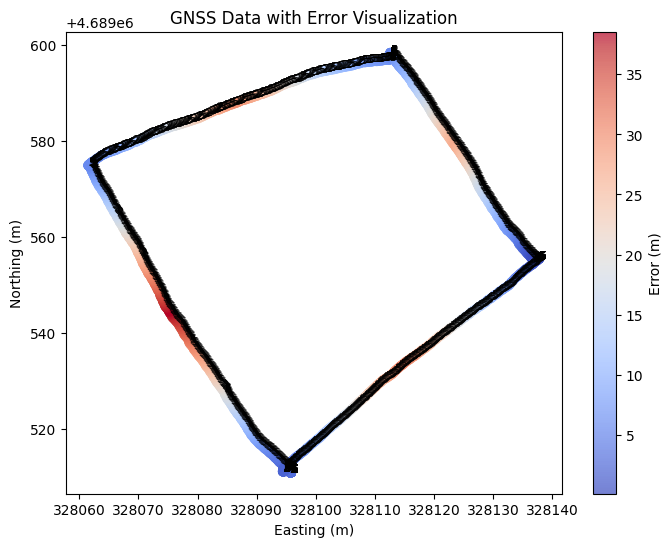

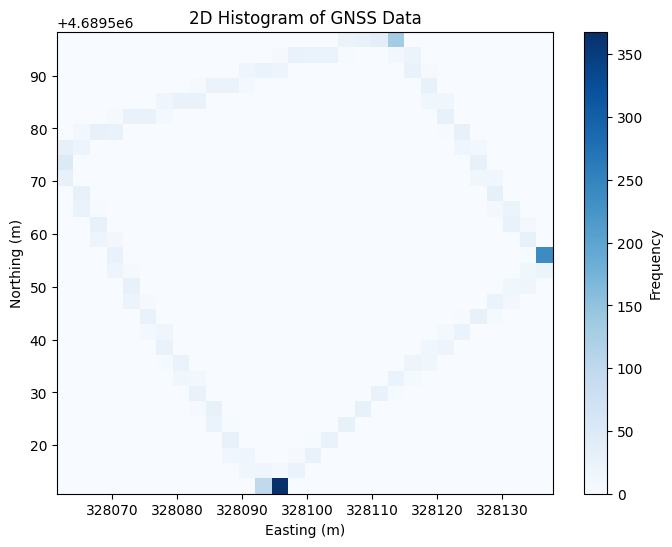

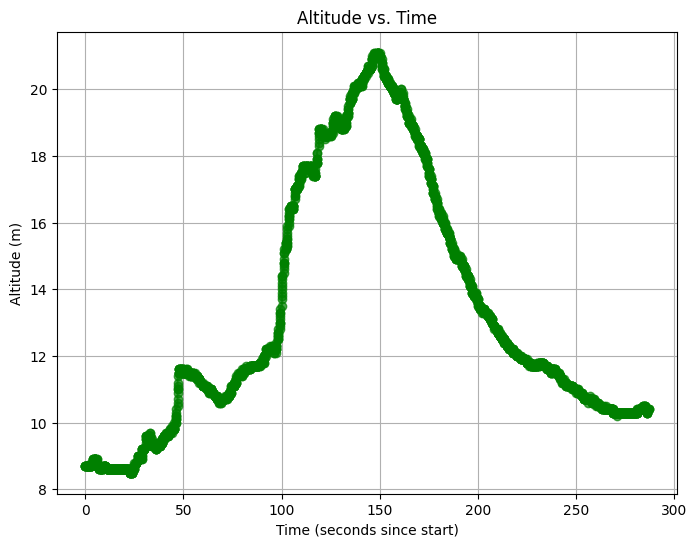

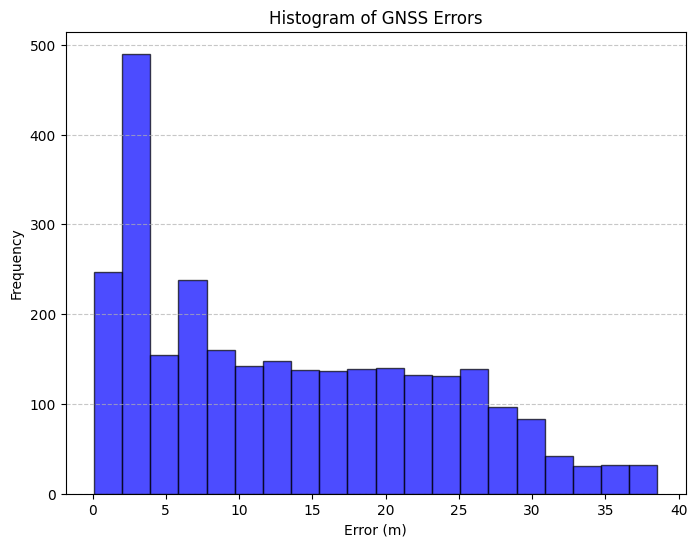

In [6]:
import re
import numpy as np
import utm
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt


# Function to parse GNGGA sentences
def parse_gngga(sentence):
    fields = sentence.split(',')
    if len(fields) < 15:
        return None
    try:
        lat = float(fields[2])
        lat_dir = fields[3]
        lon = float(fields[4])
        lon_dir = fields[5]
        fix_quality = int(fields[6])
        altitude = float(fields[9])  # Extract altitude in meters
        timestamp = fields[1]  # Extract time from NMEA sentence

        # Convert latitude and longitude to decimal degrees
        latitude = (lat // 100) + (lat % 100) / 60
        if lat_dir == 'S':
            latitude = -latitude

        longitude = (lon // 100) + (lon % 100) / 60
        if lon_dir == 'W':
            longitude = -longitude

        return latitude, longitude, altitude, fix_quality, timestamp
    except ValueError:
        return None

# Function to convert NMEA time (HHMMSS) to seconds
def parse_time(nmea_time):
    try:
        hours = int(nmea_time[:2])
        minutes = int(nmea_time[2:4])
        seconds = int(nmea_time[4:6])
        return hours * 3600 + minutes * 60 + seconds  # Convert to total seconds
    except:
        return None

# Function to extract GNGGA data from a file
def extract_gngga_data(filename):
    extracted_data = []
    with open(filename, 'r', encoding='latin-1') as file:
        for line in file:
            if '$GNGGA' in line:
                parsed = parse_gngga(line)
                if parsed:
                    extracted_data.append(parsed)
    # Convert the list of lists to a NumPy array with the correct data type
    extracted_data = np.array(extracted_data, dtype=object)
    return extracted_data

# Function to convert lat/lon to UTM
def convert_to_utm(data):
    utm_coords = [utm.from_latlon(lat, lon)[:2] for lat, lon, _, _, _ in data]
    fix_quality = [fix for _, _, _, fix, _ in data]
    altitudes = [alt for _, _, alt, _, _ in data]
    times = [parse_time(t) for _, _, _, _, t in data]
    return np.array(utm_coords), np.array(fix_quality), np.array(altitudes), np.array(times)

# Function to compute error
def compute_error(utm_coords, true_positions):
    true_utm_coords = np.array([utm.from_latlon(lat, lon)[:2] for lat, lon in true_positions])
    distances = np.min(np.linalg.norm(utm_coords[:, np.newaxis, :] - true_utm_coords, axis=2), axis=1)
    return distances

# Function to compute RMSE
def compute_rmse(errors):
    return np.sqrt(np.mean(errors**2))

# Function to plot GNSS data
def plot_gnss_data(utm_coords, errors, fix_quality):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(utm_coords[:, 0], utm_coords[:, 1], c=errors, cmap='coolwarm', alpha=0.7)
    plt.colorbar(scatter, label='Error (m)')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('GNSS Data with Error Visualization')

    # Fix quality annotation
    for i in range(len(fix_quality)):
        plt.annotate(f"{fix_quality[i]}", (utm_coords[i, 0], utm_coords[i, 1]), fontsize=8, alpha=0.7)

    plt.show()

# Function to plot 2D histogram
def plot_2d_histogram(utm_coords):
    plt.figure(figsize=(8, 6))
    plt.hist2d(utm_coords[:, 0], utm_coords[:, 1], bins=30, cmap='Blues')
    plt.colorbar(label='Frequency')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('2D Histogram of GNSS Data')
    plt.show()

# Function to plot altitude vs time
def plot_altitude_vs_time(times, altitudes):
    plt.figure(figsize=(8, 6))
    plt.plot(times - times[0], altitudes, marker='o', linestyle='-', color='g', alpha=0.7)
    plt.xlabel('Time (seconds since start)')
    plt.ylabel('Altitude (m)')
    plt.title('Altitude vs. Time')
    plt.grid()
    plt.show()

# Example usage
filename = '/content/occluded-sqr.txt'  # Replace with actual filename
data = extract_gngga_data(filename)
utm_coords, fix_quality, altitudes, times = convert_to_utm(data)
true_positions = [
    (42.338866, -71.086800),
                (42.339480, -71.087241),
                (42.339711, -71.086586),
                (42.339280, -71.086276),
                (42.338866, -71.086800)
]  # True reference position

errors = compute_error(utm_coords, true_positions)
rmse = compute_rmse(errors)

print(f"RMSE: {rmse:.4f} meters")

plot_gnss_data(utm_coords, errors, fix_quality)
plot_2d_histogram(utm_coords)
plot_altitude_vs_time(times, altitudes)


# Function to plot a histogram of GNSS errors
def plot_error_histogram(errors):
    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=20, color='blue', edgecolor='black', alpha=0.7)  # Adjust bins as needed
    plt.xlabel('Error (m)')
    plt.ylabel('Frequency')
    plt.title('Histogram of GNSS Errors')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


filename = '/content/occluded-sqr.txt'
data = extract_gngga_data(filename)
utm_coords, fix_quality, altitudes, times = convert_to_utm(data)
errors = compute_error(utm_coords, true_positions)

# Plot the histogram of errors
plot_error_histogram(errors)


RMSE: 18.0428 meters


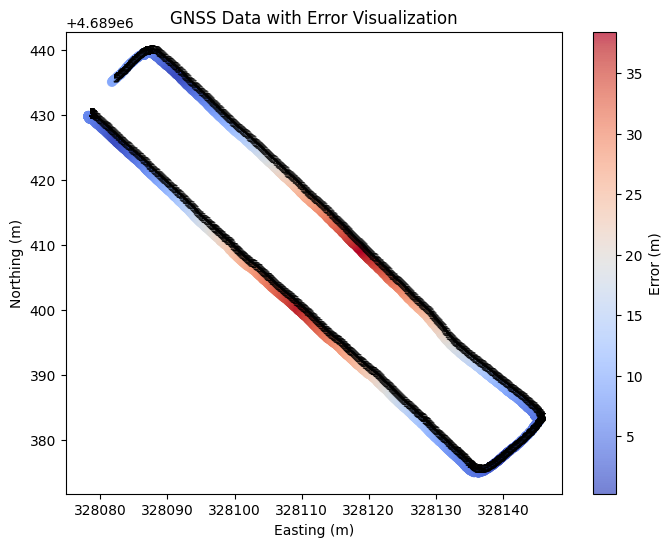

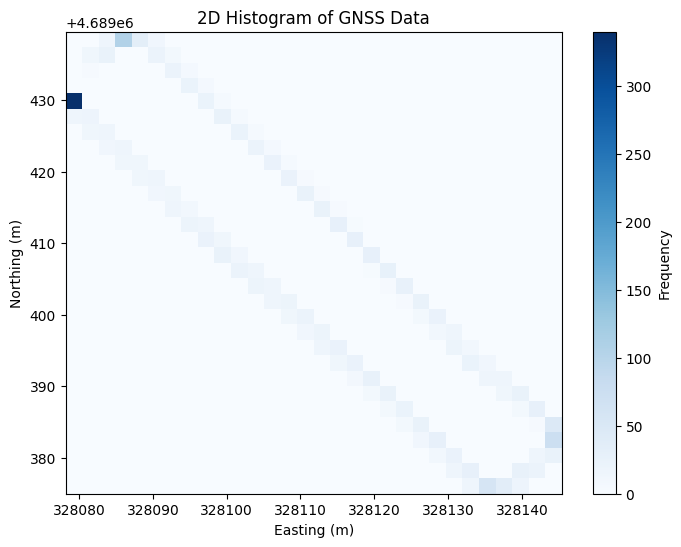

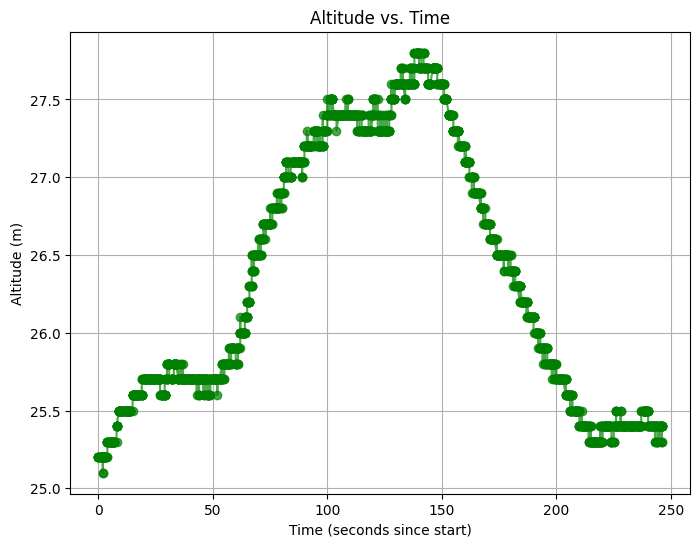

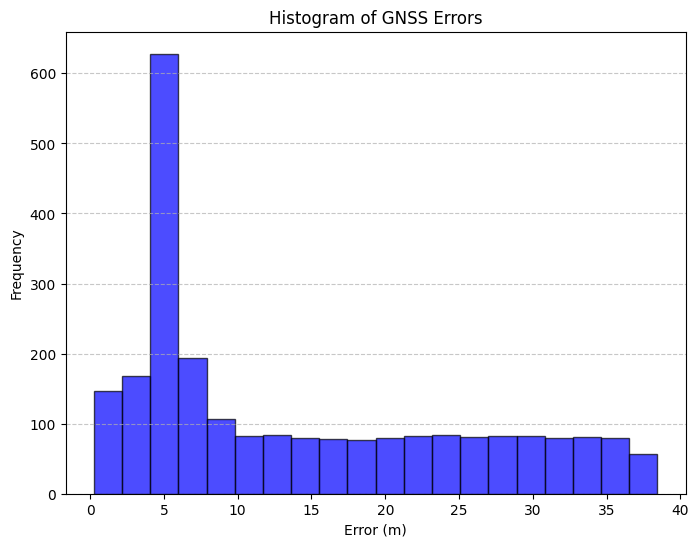

In [9]:
import re
import numpy as np
import utm
import matplotlib.pyplot as plt
from datetime import datetime

# Function to parse GNGGA sentences
def parse_gngga(sentence):
    fields = sentence.split(',')
    if len(fields) < 15:
        return None
    try:
        lat = float(fields[2])
        lat_dir = fields[3]
        lon = float(fields[4])
        lon_dir = fields[5]
        fix_quality = int(fields[6])
        altitude = float(fields[9])  # Extract altitude in meters
        timestamp = fields[1]  # Extract time from NMEA sentence

        # Convert latitude and longitude to decimal degrees
        latitude = (lat // 100) + (lat % 100) / 60
        if lat_dir == 'S':
            latitude = -latitude

        longitude = (lon // 100) + (lon % 100) / 60
        if lon_dir == 'W':
            longitude = -longitude

        return latitude, longitude, altitude, fix_quality, timestamp
    except ValueError:
        return None

# Function to convert NMEA time (HHMMSS) to seconds
def parse_time(nmea_time):
    try:
        hours = int(nmea_time[:2])
        minutes = int(nmea_time[2:4])
        seconds = int(nmea_time[4:6])
        return hours * 3600 + minutes * 60 + seconds  # Convert to total seconds
    except:
        return None

# Function to extract GNGGA data from a file
def extract_gngga_data(filename):
    extracted_data = []
    with open(filename, 'r', encoding='latin-1') as file:
        for line in file:
            if '$GNGGA' in line:
                parsed = parse_gngga(line)
                if parsed:
                    extracted_data.append(parsed)
    # Convert the list of lists to a NumPy array with the correct data type
    extracted_data = np.array(extracted_data, dtype=object)
    return extracted_data

# Function to convert lat/lon to UTM
def convert_to_utm(data):
    utm_coords = [utm.from_latlon(lat, lon)[:2] for lat, lon, _, _, _ in data]
    fix_quality = [fix for _, _, _, fix, _ in data]
    altitudes = [alt for _, _, alt, _, _ in data]
    times = [parse_time(t) for _, _, _, _, t in data]
    return np.array(utm_coords), np.array(fix_quality), np.array(altitudes), np.array(times)

# Function to compute error
def compute_error(utm_coords, true_positions):
    true_utm_coords = np.array([utm.from_latlon(lat, lon)[:2] for lat, lon in true_positions])
    distances = np.min(np.linalg.norm(utm_coords[:, np.newaxis, :] - true_utm_coords, axis=2), axis=1)
    return distances

# Function to compute RMSE
def compute_rmse(errors):
    return np.sqrt(np.mean(errors**2))

# Function to plot GNSS data
def plot_gnss_data(utm_coords, errors, fix_quality):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(utm_coords[:, 0], utm_coords[:, 1], c=errors, cmap='coolwarm', alpha=0.7)
    plt.colorbar(scatter, label='Error (m)')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('GNSS Data with Error Visualization')

    # Fix quality annotation
    for i in range(len(fix_quality)):
        plt.annotate(f"{fix_quality[i]}", (utm_coords[i, 0], utm_coords[i, 1]), fontsize=8, alpha=0.7)

    plt.show()

# Function to plot 2D histogram
def plot_2d_histogram(utm_coords):
    plt.figure(figsize=(8, 6))
    plt.hist2d(utm_coords[:, 0], utm_coords[:, 1], bins=30, cmap='Blues')
    plt.colorbar(label='Frequency')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('2D Histogram of GNSS Data')
    plt.show()

# Function to plot altitude vs time
def plot_altitude_vs_time(times, altitudes):
    plt.figure(figsize=(8, 6))
    plt.plot(times - times[0], altitudes, marker='o', linestyle='-', color='g', alpha=0.7)
    plt.xlabel('Time (seconds since start)')
    plt.ylabel('Altitude (m)')
    plt.title('Altitude vs. Time')
    plt.grid()
    plt.show()

# Example usage
filename = '/content/open-square.txt'  # Replace with actual filename
data = extract_gngga_data(filename)
utm_coords, fix_quality, altitudes, times = convert_to_utm(data)
true_positions = [
    (42.3381, -71.0869),
(42.3382, -71.0868),
(42.33775, -71.08608),
(42.3376807, -71.0861906)
]  # True reference position

errors = compute_error(utm_coords, true_positions)
rmse = compute_rmse(errors)

print(f"RMSE: {rmse:.4f} meters")

plot_gnss_data(utm_coords, errors, fix_quality)
plot_2d_histogram(utm_coords)
plot_altitude_vs_time(times, altitudes)


# Function to plot a histogram of GNSS errors
def plot_error_histogram(errors):
    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=20, color='blue', edgecolor='black', alpha=0.7)  # Adjust bins as needed
    plt.xlabel('Error (m)')
    plt.ylabel('Frequency')
    plt.title('Histogram of GNSS Errors')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


filename = '/content/open-square.txt'
data = extract_gngga_data(filename)
utm_coords, fix_quality, altitudes, times = convert_to_utm(data)
errors = compute_error(utm_coords, true_positions)

# Plot the histogram of errors
plot_error_histogram(errors)


RMSE: 0.4253 meters


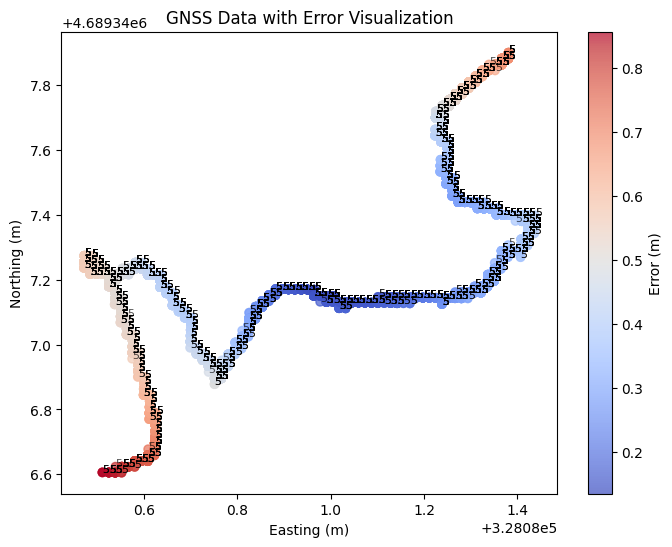

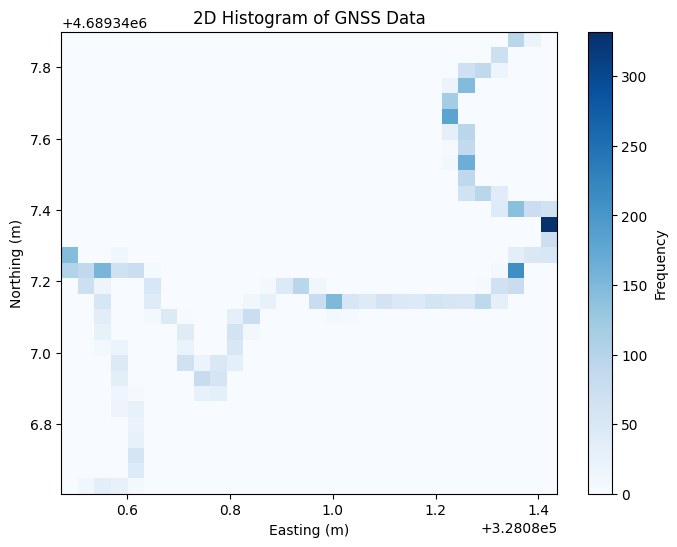

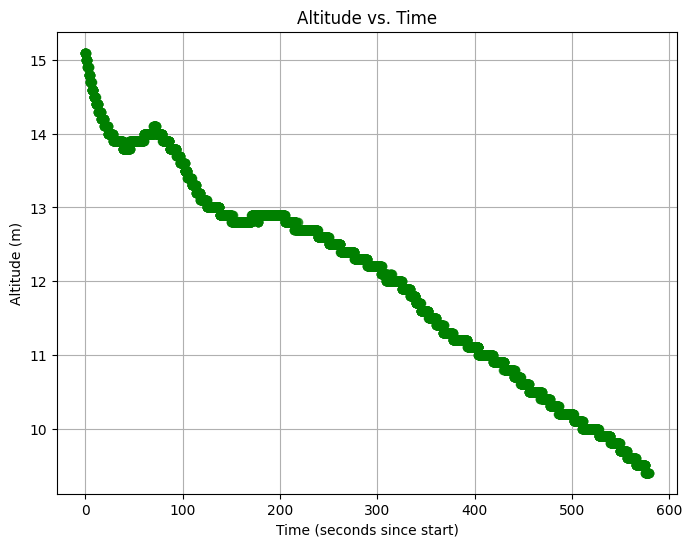

In [14]:
import re
import numpy as np
import utm
import matplotlib.pyplot as plt
from datetime import datetime

# Function to parse GNGGA sentences
def parse_gngga(sentence):
    fields = sentence.split(',')
    if len(fields) < 15:
        return None
    try:
        lat = float(fields[2])
        lat_dir = fields[3]
        lon = float(fields[4])
        lon_dir = fields[5]
        fix_quality = int(fields[6])
        altitude = float(fields[9])  # Extract altitude in meters
        timestamp = fields[1]  # Extract time from NMEA sentence

        # Convert latitude and longitude to decimal degrees
        latitude = (lat // 100) + (lat % 100) / 60
        if lat_dir == 'S':
            latitude = -latitude

        longitude = (lon // 100) + (lon % 100) / 60
        if lon_dir == 'W':
            longitude = -longitude

        return latitude, longitude, altitude, fix_quality, timestamp
    except ValueError:
        return None

# Function to convert NMEA time (HHMMSS) to seconds
def parse_time(nmea_time):
    try:
        hours = int(nmea_time[:2])
        minutes = int(nmea_time[2:4])
        seconds = int(nmea_time[4:6])
        return hours * 3600 + minutes * 60 + seconds  # Convert to total seconds
    except:
        return None

# Function to extract GNGGA data from a file
def extract_gngga_data(filename):
    extracted_data = []
    with open(filename, 'r', encoding='latin-1') as file:
        for line in file:
            if '$GNGGA' in line:
                parsed = parse_gngga(line)
                if parsed:
                    extracted_data.append(parsed)
    # Convert the list of lists to a NumPy array with the correct data type
    extracted_data = np.array(extracted_data, dtype=object)
    return extracted_data

# Function to convert lat/lon to UTM
def convert_to_utm(data):
    utm_coords = [utm.from_latlon(lat, lon)[:2] for lat, lon, _, _, _ in data]
    fix_quality = [fix for _, _, _, fix, _ in data]
    altitudes = [alt for _, _, alt, _, _ in data]
    times = [parse_time(t) for _, _, _, _, t in data]
    return np.array(utm_coords), np.array(fix_quality), np.array(altitudes), np.array(times)

# Function to compute error using mean position as reference
def compute_error(utm_coords):
    mean_position = np.mean(utm_coords, axis=0)  # Compute the mean UTM coordinates
    distances = np.linalg.norm(utm_coords - mean_position, axis=1)  # Compute Euclidean distances
    return distances

# Function to compute RMSE
def compute_rmse(errors):
    return np.sqrt(np.mean(errors**2))

# Function to plot GNSS data
def plot_gnss_data(utm_coords, errors, fix_quality):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(utm_coords[:, 0], utm_coords[:, 1], c=errors, cmap='coolwarm', alpha=0.7)
    plt.colorbar(scatter, label='Error (m)')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('GNSS Data with Error Visualization')

    # Fix quality annotation
    for i in range(len(fix_quality)):
        plt.annotate(f"{fix_quality[i]}", (utm_coords[i, 0], utm_coords[i, 1]), fontsize=8, alpha=0.7)

    plt.show()

# Function to plot 2D histogram
def plot_2d_histogram(utm_coords):
    plt.figure(figsize=(8, 6))
    plt.hist2d(utm_coords[:, 0], utm_coords[:, 1], bins=30, cmap='Blues')
    plt.colorbar(label='Frequency')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('2D Histogram of GNSS Data')
    plt.show()

# Function to plot altitude vs time
def plot_altitude_vs_time(times, altitudes):
    plt.figure(figsize=(8, 6))
    plt.plot(times - times[0], altitudes, marker='o', linestyle='-', color='g', alpha=0.7)
    plt.xlabel('Time (seconds since start)')
    plt.ylabel('Altitude (m)')
    plt.title('Altitude vs. Time')
    plt.grid()
    plt.show()

# Example usage
filename = '/content/occluded-stationary-issec.txt'
data = extract_gngga_data(filename)
utm_coords, fix_quality, altitudes, times = convert_to_utm(data)

errors = compute_error(utm_coords)
rmse = compute_rmse(errors)

print(f"RMSE: {rmse:.4f} meters")

plot_gnss_data(utm_coords, errors, fix_quality)
plot_2d_histogram(utm_coords)
plot_altitude_vs_time(times, altitudes)


RMSE: 0.0702 meters


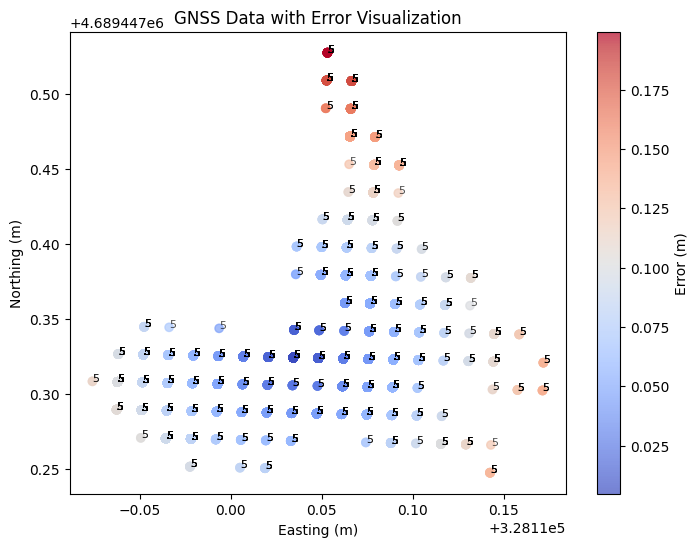

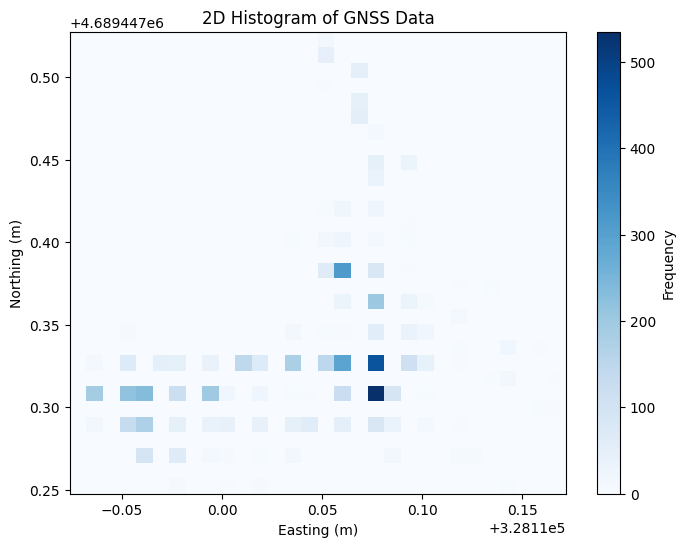

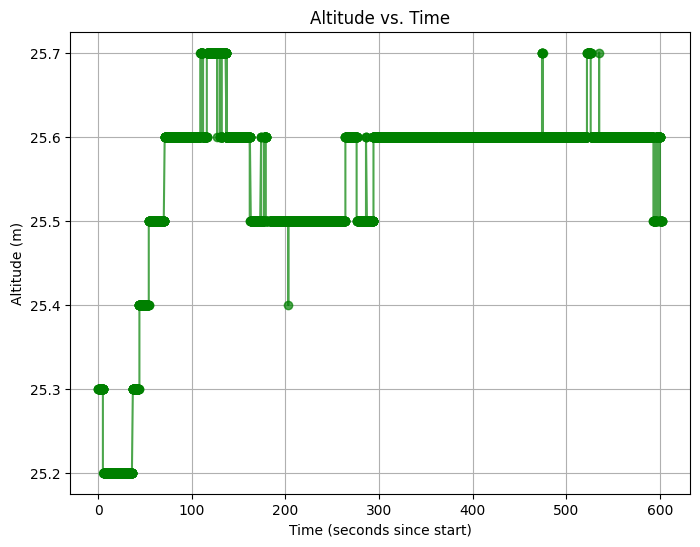

In [11]:
import re
import numpy as np
import utm
import matplotlib.pyplot as plt
from datetime import datetime

# Function to parse GNGGA sentences
def parse_gngga(sentence):
    fields = sentence.split(',')
    if len(fields) < 15:
        return None
    try:
        lat = float(fields[2])
        lat_dir = fields[3]
        lon = float(fields[4])
        lon_dir = fields[5]
        fix_quality = int(fields[6])
        altitude = float(fields[9])  # Extract altitude in meters
        timestamp = fields[1]  # Extract time from NMEA sentence

        # Convert latitude and longitude to decimal degrees
        latitude = (lat // 100) + (lat % 100) / 60
        if lat_dir == 'S':
            latitude = -latitude

        longitude = (lon // 100) + (lon % 100) / 60
        if lon_dir == 'W':
            longitude = -longitude

        return latitude, longitude, altitude, fix_quality, timestamp
    except ValueError:
        return None

# Function to convert NMEA time (HHMMSS) to seconds
def parse_time(nmea_time):
    try:
        hours = int(nmea_time[:2])
        minutes = int(nmea_time[2:4])
        seconds = int(nmea_time[4:6])
        return hours * 3600 + minutes * 60 + seconds  # Convert to total seconds
    except:
        return None

# Function to extract GNGGA data from a file
def extract_gngga_data(filename):
    extracted_data = []
    with open(filename, 'r', encoding='latin-1') as file:
        for line in file:
            if '$GNGGA' in line:
                parsed = parse_gngga(line)
                if parsed:
                    extracted_data.append(parsed)
    # Convert the list of lists to a NumPy array with the correct data type
    extracted_data = np.array(extracted_data, dtype=object)
    return extracted_data

# Function to convert lat/lon to UTM
def convert_to_utm(data):
    utm_coords = [utm.from_latlon(lat, lon)[:2] for lat, lon, _, _, _ in data]
    fix_quality = [fix for _, _, _, fix, _ in data]
    altitudes = [alt for _, _, alt, _, _ in data]
    times = [parse_time(t) for _, _, _, _, t in data]
    return np.array(utm_coords), np.array(fix_quality), np.array(altitudes), np.array(times)

# Function to compute error using mean position as reference
def compute_error(utm_coords):
    mean_position = np.mean(utm_coords, axis=0)  # Compute the mean UTM coordinates
    distances = np.linalg.norm(utm_coords - mean_position, axis=1)  # Compute Euclidean distances
    return distances

# Function to compute RMSE
def compute_rmse(errors):
    return np.sqrt(np.mean(errors**2))

# Function to plot GNSS data
def plot_gnss_data(utm_coords, errors, fix_quality):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(utm_coords[:, 0], utm_coords[:, 1], c=errors, cmap='coolwarm', alpha=0.7)
    plt.colorbar(scatter, label='Error (m)')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('GNSS Data with Error Visualization')

    # Fix quality annotation
    for i in range(len(fix_quality)):
        plt.annotate(f"{fix_quality[i]}", (utm_coords[i, 0], utm_coords[i, 1]), fontsize=8, alpha=0.7)

    plt.show()

# Function to plot 2D histogram
def plot_2d_histogram(utm_coords):
    plt.figure(figsize=(8, 6))
    plt.hist2d(utm_coords[:, 0], utm_coords[:, 1], bins=30, cmap='Blues')
    plt.colorbar(label='Frequency')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('2D Histogram of GNSS Data')
    plt.show()

# Function to plot altitude vs time
def plot_altitude_vs_time(times, altitudes):
    plt.figure(figsize=(8, 6))
    plt.plot(times - times[0], altitudes, marker='o', linestyle='-', color='g', alpha=0.7)
    plt.xlabel('Time (seconds since start)')
    plt.ylabel('Altitude (m)')
    plt.title('Altitude vs. Time')
    plt.grid()
    plt.show()

# Example usage
filename = '/content/open-stat-1.txt'
data = extract_gngga_data(filename)
utm_coords, fix_quality, altitudes, times = convert_to_utm(data)

errors = compute_error(utm_coords)
rmse = compute_rmse(errors)

print(f"RMSE: {rmse:.4f} meters")

plot_gnss_data(utm_coords, errors, fix_quality)
plot_2d_histogram(utm_coords)
plot_altitude_vs_time(times, altitudes)


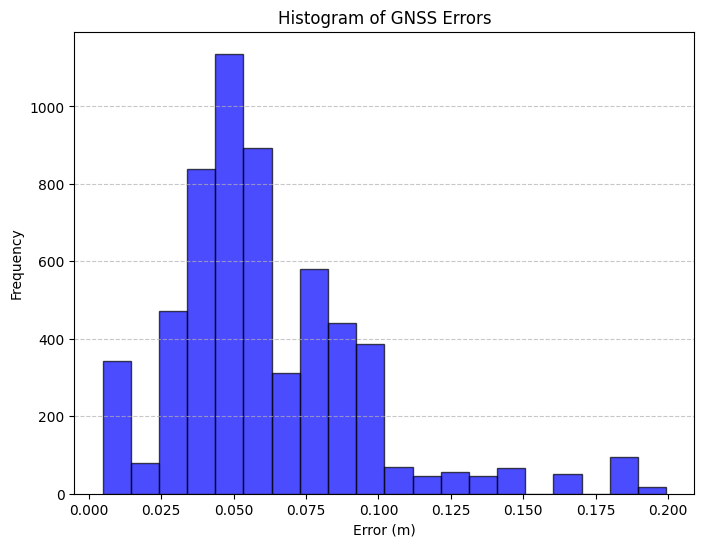

In [13]:
import re
import numpy as np
import utm
import matplotlib.pyplot as plt

# Function to parse GNGGA sentences
def parse_gngga(sentence):
    fields = sentence.split(',')
    if len(fields) < 15:
        return None
    try:
        lat = float(fields[2])
        lat_dir = fields[3]
        lon = float(fields[4])
        lon_dir = fields[5]
        fix_quality = int(fields[6])
        altitude = float(fields[9])  # Extract altitude in meters
        timestamp = fields[1]  # Extract time from NMEA sentence

        latitude = (lat // 100) + (lat % 100) / 60
        if lat_dir == 'S':
            latitude = -latitude

        longitude = (lon // 100) + (lon % 100) / 60
        if lon_dir == 'W':
            longitude = -longitude

        return latitude, longitude, fix_quality
    except ValueError:
        return None

# Function to extract GNGGA data from a file
def extract_gngga_data(filename):
    extracted_data = []
    with open(filename, 'r', encoding='latin-1') as file:
        for line in file:
            if '$GNGGA' in line:
                parsed = parse_gngga(line)
                if parsed:
                    extracted_data.append(parsed)
    return np.array(extracted_data)

# Function to convert lat/lon to UTM
def convert_to_utm(data):
    utm_coords = [utm.from_latlon(lat, lon)[:2] for lat, lon, _ in data]
    return np.array(utm_coords)

# Function to compute error
def compute_error(utm_coords, true_position):
    """
    Computes the error between UTM coordinates and the mean true position.
    """
    # Convert true position to UTM coordinates
    true_utm = np.array(utm.from_latlon(true_position[0], true_position[1])[:2])

    # Compute Euclidean distance from each UTM coordinate to the mean true UTM position
    distances = np.linalg.norm(utm_coords - true_utm, axis=1)

    return distances

# Function to plot the data
def plot_gnss_data(utm_coords, errors):
    plt.figure(figsize=(8, 6))
    plt.scatter(utm_coords[:, 0], utm_coords[:, 1], c=errors, cmap='coolwarm', alpha=0.7)
    plt.colorbar(label='Error (m)')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.title('GNSS Data with Error Visualization')
    plt.show()


filename = '/content/open-stat-1.txt'
data = extract_gngga_data(filename)
utm_coords = convert_to_utm(data)

# Compute mean latitude and longitude as true position
mean_lat = np.mean(data[:, 0])
mean_lon = np.mean(data[:, 1])
true_position = [mean_lat, mean_lon]

def plot_error_histogram(errors):
    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=20, color='blue', edgecolor='black', alpha=0.7)  # Adjust bins as needed
    plt.xlabel('Error (m)')
    plt.ylabel('Frequency')
    plt.title('Histogram of GNSS Errors')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Compute errors using the mean position
errors = compute_error(utm_coords, true_position)

# Plot the GNSS data with error visualization
plot_error_histogram(errors)





